# Project IronFox MK I

This project is a sequel to Project Fire Fox. It documents the creation of the function that will be used later in querying the database for the purpose of rendering the information on the website.

In [1]:
#calling library
#change the kinase_declarative_backup to kinase_declarative
from Database.kinase_declarative import *
from sqlalchemy import create_engine, or_, and_
from sqlalchemy.orm import sessionmaker
from pprint import pprint

In [2]:
#create engine and bine the engine
engine = create_engine("sqlite:///kinase_database.db")
Base.metadata.bind = engine

In [3]:
#create a session object
session = sessionmaker(bind=engine)
s = session()

In [4]:
import os
os.getcwd()

'/homes/zho30/Projects/Uni/BioInformaticsGroupPorject/DreamTeam/app'

# Table of contents

Click on the link below to go to the section in this notebook.

1. [Intermediate kinase results page](#Intermediate-kinase-results-page)
    1. [Function to return a list of all human kinases](#Function-to-return-a-list-of-all-human-kinases)
    2. [Function to return the gene name, the aliases and the protein name](#Function-to-return-the-gene-name,-the-aliases-and-the-protein-name)
        
    3. [Function to return gene aliases and protein name](Function-to-return-gene-aliases-and-protein-name)
       
2. [Individual kinase page](#Individual-kinase-page)
    1. [Function to return gene name, family, protein name, uniprot entry, uniprot number](#Function-to-return-gene-name,-family,-protein-name,-uniprot-entry,-uniprot-number) 
        
    2. [Function to return subcellular location of kinase](#Function-to-return-subcellular-location-of-kinase)
        
    3. [Function to return the inhibitors from a kinase](#Function-to-return-the-inhibitors-from-a-kinase)
       
    4. [Function to return substrates and phosphosites from a kinase](#Function-to-return-substrates-and-phosphosites-from-a-kinase)
        
3. [Inhibitor Page](#Inhibitor-Page)
    1. [Function to return all meta details of all inhibitors](#Function-to-return-all-meta-details-of-all-inhibitors)
        
    2. [Function to return all the inhibitor meta data from an inhibitor](#Function-to-return-all-the-inhibitor-meta-data-from-an-inhibitor)
       
    3. [Function to return the meta details of inhibitor from a gene](#Function-to-return-the-meta-details-of-inhibitor-from-a-gene)
      
4. [Returning kinase for the substrate-phospho-inhibitor analysis page](#Returning-kinase-for-the-substrate-phospho-inhibitor-analysis-page)
    1. [Function to return a kinase using a substrate and a phosphosite](#Function-to-return-subcellular-location-of-kinase)
       
    2. [Function to return kinase with substrate and phosphosite](#Function-to-return-kinase-with-substrate-and-phosphosite)
        
5. [Phosphosite search](#Phosphosite-search)
    1. [Function to return all the chromosome](#Function-to-return-all-the-chromosome)
    2. [Function to get the karyotype bands given the chromosome](#Function-to-get-the-karyotype-bands-given-the-chromosome)
    3. [Function to return a list of phosphosites given the chromosome and karyotype](#Function-to-return-a-list-of-phosphosites-given-the-chromosome-and-karyotype)
    4. [Function to return the substrate and phosphosite data given the user input chromosome number, karyotype band, location](#Function-to-return-the-substrate-and-phosphosite-data-given-the-user-input-chromosome-number,-karyotype-band,-location)
6. [Substrate search](#Substrate-search) 
    1. [Function to return a substrate meta data and its phosphosites' metadata from a substrate](#Function-to-return-a-substrate-meta-data-and-its-phosphosites'-metadata-from-a-substrate)
6. [Additional functions which might come in handy](#Additional-functions-which-might-come-in-handy)
    1. [Function to return the kinase gene through an inhibitor](#Function-to-return-the-kinase-gene-through-an-inhibitor)
    2. [Function to return the meta data for phosphosites from a substrate](#Function-to-return-the-meta-data-for-phosphosites-from-a-substrate)
   

# Intermediate kinase results page

This section documents the creation of functions for the following page.

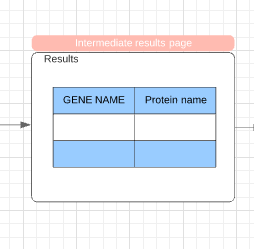

In [4]:
kinase_input = "AKT3_HUMAN"
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias==kinase_input, KinaseGeneMeta.uniprot_entry==kinase_input,\
                                   KinaseGeneMeta.uniprot_number==kinase_input, KinaseGeneMeta.protein_name==kinase_input)).all()
for row in kinase_query:
    print(row.to_dict())

{'protein_name': 'RAC-gamma serine/threonine-protein kinase', 'uniprot_number': 'Q9Y243', 'uniprot_entry': 'AKT3_HUMAN', 'gene_name': 'AKT3', 'kinase_family': 'AGC Ser/Thr protein kinase family', 'gene_aliases': ['AKT3', 'PKBG']}


## Function to return a list of all human kinases

In [8]:
#create a function to return a list of human kinases
def get_all_aliases():
    """
    Returns a list of all aliases. 
    """
    all_aliases = [x[0] for x in s.query(KinaseGeneName.gene_alias).all()]
    return all_aliases
get_all_aliases()

['AAK1',
 'AARF',
 'AATK',
 'AATYK',
 'AATYK2',
 'ABL',
 'ABL1',
 'ABL2',
 'ABLL',
 'ACK1',
 'ACVR1',
 'ACVR1B',
 'ACVR1C',
 'ACVR2',
 'ACVR2A',
 'ACVR2B',
 'ACVRL1',
 'ACVRLK1',
 'ACVRLK2',
 'ACVRLK3',
 'ACVRLK4',
 'ADCK1',
 'ADCK2',
 'ADCK3',
 'ADCK4',
 'ADCK5',
 'ADRBK1',
 'ADRBK2',
 'AGMX1',
 'AIE2',
 'AIK',
 'AIK2',
 'AIK3',
 'AIM1',
 'AIRK1',
 'AIRK2',
 'AIRK3',
 'AKT1',
 'AKT2',
 'AKT3',
 'ALK',
 'ALK1',
 'ALK3',
 'ALK4',
 'ALK5',
 'ALK7',
 'ALPK1',
 'ALPK2',
 'ALPK3',
 'ALS2CR2',
 'ALS2CR7',
 'AMHR',
 'AMHR2',
 'AMPK',
 'AMPK1',
 'AMPK2',
 'ANKK1',
 'ANKRD3',
 'ANPRA',
 'ANPRB',
 'APEG1',
 'ARAF',
 'ARAF1',
 'ARG',
 'ARK1',
 'ARK2',
 'ARK3',
 'ARK5',
 'ASK1',
 'ASK2',
 'ASK3',
 'ATK',
 'ATM',
 'ATR',
 'ATX',
 'AURA',
 'AURKA',
 'AURKB',
 'AURKC',
 'AXL',
 'AYK1',
 'B55',
 'BARK',
 'BARK1',
 'BARK2',
 'BCKDK',
 'BCON3',
 'BDTK',
 'BEK',
 'BFGFR',
 'BIKE',
 'BLK',
 'BMK1',
 'BMP2K',
 'BMPR1A',
 'BMPR1B',
 'BMPR2',
 'BMX',
 'BPK',
 'BRAF',
 'BRAF1',
 'BREK',
 'BRK',
 'BRSK1',
 'BR

## Function to return the gene name, the aliases and the protein name

In [6]:
kinase_input = "AKT"
like_kin = "%{}%".format(kinase_input)
tmp = []
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
for meta in kinase_query:
    pprint([alias.gene_alias for alias in meta.gene_aliases])

['AKT1', 'PKB', 'RAC']
['AKT2']
['AKT3', 'PKBG']


In [7]:
kinase_input = "AKT"
like_kin = "%{}%".format(kinase_input)
tmp = []
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
for meta in kinase_query:
    pprint(meta.to_dict())uniprot

{'gene_aliases': ['AKT1', 'PKB', 'RAC'],
 'gene_name': 'AKT1',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'protein_name': 'RAC-alpha serine/threonine-protein kinase',
 'uniprot_entry': 'AKT1_HUMAN',
 'uniprot_number': 'P31749'}
{'gene_aliases': ['AKT2'],
 'gene_name': 'AKT2',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'protein_name': 'RAC-beta serine/threonine-protein kinase',
 'uniprot_entry': 'AKT2_HUMAN',
 'uniprot_number': 'P31751'}
{'gene_aliases': ['AKT3', 'PKBG'],
 'gene_name': 'AKT3',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'protein_name': 'RAC-gamma serine/threonine-protein kinase',
 'uniprot_entry': 'AKT3_HUMAN',
 'uniprot_number': 'Q9Y243'}


In [4]:
def get_gene_alias_protein_name(kinase_input):
    """ (str) --> list of dictionary
    Returns a list of dictionary.
    In the dictionary, there are gene name and protein name.
    Returns empty list when no match is found.
    >> kin = "AKT"
    >> get_gene_alias_protein_name(kin)
    [{'Gene_Name': 'AKT1', 'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, 
    {'Gene_Name': 'AKT2', 'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, 
    {'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    >> get_gene_alias_protein_name("Q9Y243")
    [{'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    """
    like_kin = "%{}%".format(kinase_input) #changing the user input so that it's usable with like
    tmp = []
    #query KinaseGeneMeta and KinaseGeneName for entry that resembled the user input
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
    #put the results of the object into a dictionary
    for meta in kinase_query:
        results = {}
        results["Gene_Name"] = meta.to_dict()["gene_name"]
        results["Gene aliases"] = meta.to_dict()["gene_aliases"]
        results["Protein_Name"] = meta.to_dict()["protein_name"]
        tmp.append(results)
    return tmp
kin = "AKT"
uni_num = "Q9Y243"
print(get_gene_alias_protein_name(kin))
print(get_gene_alias_protein_name(uni_num))

[{'Gene_Name': 'AKT1', 'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, {'Gene_Name': 'AKT2', 'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, {'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
[{'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]


## Function to return gene aliases and protein name

In [5]:
def get_aliases_protein_name(kinase_input):
    """
    Returns a list of dictionary.
    In the dictionary, there are gene name and protein name.
    Returns empty list when no match is found.
    >> kin = "AKT"
    >> get_aliases_protein_name(kin)
    [{'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, 
    {'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, 
    {'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    [{'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    >> get_aliases_protein_name("Q9Y243")
    [{'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    """
    like_kin = "%{}%".format(kinase_input)
    tmp = []
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
    for meta in kinase_query:
        results = {}
        #results["Gene_Name"] = meta.to_dict()["gene_name"]
        results["Gene aliases"] = meta.to_dict()["gene_aliases"]
        results["Protein_Name"] = meta.to_dict()["protein_name"]
        tmp.append(results)
    return tmp
kin = "AKT"
uni_num = "Q9Y243"
print(get_aliases_protein_name(kin))
print(get_aliases_protein_name(uni_num))

[{'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, {'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, {'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
[{'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]


# Individual kinase page

The following section documents the creation of function for individual kinase. There will be multiple functions for this section.

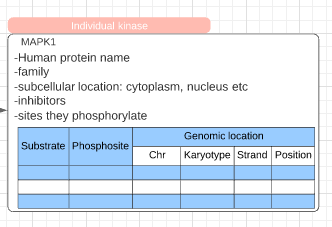

## Function to return gene name, family, protein name, uniprot entry, uniprot number

In [10]:
kinase = "AKT3"
kinase = s.query(KinaseGeneMeta).filter(KinaseGeneMeta.gene_name==kinase).one()
kinase.to_dict()

{'protein_name': 'RAC-gamma serine/threonine-protein kinase',
 'uniprot_number': 'Q9Y243',
 'uniprot_entry': 'AKT3_HUMAN',
 'gene_name': 'AKT3',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'gene_aliases': ['AKT3', 'PKBG']}

In [42]:
def get_gene_metadata_from_gene(kinase_str):
    """ (str) --> dict
    Takes in a gene name as a string then output a dictionary.
    Raises error if wrong or invalid gene name is given.
    >> get_gene_metadata_from_gene("MAPK1")
    {'gene_name': 'MAPK1', 
    'kinase_family': 'CMGC Ser/Thr protein kinase family',
    'protein_name': 'Mitogen-activated protein kinase 1',
    'uniprot_entry': 'MK01_HUMAN',
    'uniprot_number': 'P28482'}
    """
    #query gene_name in KinaseGeneMeta for user input
    kinase_obj = s.query(KinaseGeneMeta).filter(KinaseGeneMeta.gene_name==kinase_str).one()
    return kinase_obj.to_dict()
pprint(get_gene_metadata_from_gene("MAPK1"))

{'gene_aliases': ['MAPK1', 'ERK2', 'PRKM1', 'PRKM2'],
 'gene_name': 'MAPK1',
 'kinase_family': 'CMGC Ser/Thr protein kinase family',
 'protein_name': 'Mitogen-activated protein kinase 1',
 'uniprot_entry': 'MK01_HUMAN',
 'uniprot_number': 'P28482'}


## Function to return subcellular location of kinase

In [17]:
kinase = "ALPK1"
kinase_query = s.query(KinaseSubcellularLocation).join(KinaseGeneMeta).join(KinaseGeneName).\
filter(KinaseGeneName.gene_alias==kinase).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
filter(KinaseGeneMeta.gene_name==KinaseSubcellularLocation.gene_name).all()
for row in kinase_query:
    print(row.subcellular_location)

Cytosol
Cytoplasm


In [7]:
def get_subcellular_location_from_gene(kinase_gene):
    """ (str) --> dict
    Returns a list of dictionary.
    The dictionary has the gene as the key and the subcellular location in the list.
    >> get_subcellular_location_from_gene('MAPK1')
    {'Gene_Name': 'MAPK1', 'Subcellular_Locations': ['Cytoplasm', 'Cytoskeleton', 'Membrane', 'Nucleus', 'Caveola', 
    'Microtubule Organizing Center', 'Spindle', 'Plasma Membrane', 'Mitotic Spindle', 'Focal Adhesion', 'Cytosol', 
    'Golgi Apparatus', 'Late Endosome', 'Early Endosome', 'Mitochondrion', 'Azurophil Granule Lumen', 'Nucleoplasm', 
    'Extracellular Region', 'Cell', 'Pseudopodium', 'Perikaryon', 'Protein-Containing Complex', 'Dendrite Cytoplasm', 
    'Axon', 'Postsynaptic Density']}
    """
    tmp = []
    results = {}
    results["Gene_Name"] = kinase_gene #initialise the dictionary with the gene name of the user input
    #query KinaseSubcellularLocation through KinaseGeneMeta via KinaseGeneName
    kinase_query = s.query(KinaseSubcellularLocation).join(KinaseGeneMeta).join(KinaseGeneName).\
    filter(KinaseGeneName.gene_alias==kinase_gene).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
    filter(KinaseGeneMeta.gene_name==KinaseSubcellularLocation.gene_name).all()
    #.all returns a list of obj, use for loop 
    for row in kinase_query: #loop through all the obj representation in kinase_query
        tmp.append(row.subcellular_location) #append all the subcellular location to tmp
    results["Subcellular_Locations"] = tmp
    return results
print(get_subcellular_location_from_gene('MAPK1'))

{'Gene_Name': 'MAPK1', 'Subcellular_Locations': ['Cytoplasm', 'Cytoskeleton', 'Membrane', 'Nucleus', 'Caveola', 'Microtubule Organizing Center', 'Spindle', 'Plasma Membrane', 'Mitotic Spindle', 'Focal Adhesion', 'Cytosol', 'Golgi Apparatus', 'Late Endosome', 'Early Endosome', 'Mitochondrion', 'Azurophil Granule Lumen', 'Nucleoplasm', 'Extracellular Region', 'Cell', 'Pseudopodium', 'Perikaryon', 'Protein-Containing Complex', 'Dendrite Cytoplasm', 'Axon', 'Postsynaptic Density']}


## Function to return the inhibitors from a kinase

In [12]:
kinase = "MAPK1"
kinase_query=s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
    filter(KinaseGeneName.gene_alias==kinase).all()
for kinase in kinase_query:
    for inhibitor in kinase.inhibitors:
        pprint(inhibitor.inhibitor_name)

'Ulixertinib'


In [26]:
def get_inhibitors_from_gene(kinase_gene):
    """ (str) --> list
    Take a string and return a list of dictionaries.
    Returns empty list if there are no inhibitors.
    >> get_inhibitors_from_gene("MAPK1")
    ['Ulixertinib']
    """
    results = []
    #query KinaseGeneMeta through KinaseGeneName
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
    filter(KinaseGeneName.gene_alias==kinase_gene).all()
    #.all() returns a list, if a gene does not have an inhibitor, it'll return an empty list
    if len(kinase_query) == 0:
        return []
    #if .all() has an inhibitor, it should only be one entry with that gene name, thus [-1]
    for inhibitor in kinase_query[-1].inhibitors:
        results.append(inhibitor.inhibitor_name)
    return results
kinase = "MAPK1"
get_inhibitors_from_gene(kinase)
# get_inhibitors_from_gene("empty")

['Ulixertinib']

## Function to return substrates and phosphosites from a kinase

In [15]:
#the codes return the substrates that are phosphosrylated by the kinase
kinase_gene = "JAK2"
kinase_obj = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase_gene).\
filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).one()
for phosphosite in kinase_obj.phosphosites:
    pprint(phosphosite.substrate.substrate_name)

'STAT5A'
'STAP2'
'STAP2'
'STAP2'
'ASK1'
'PDHK1'
'PAK1'
'PAK1'
'JAK2'
'STAP2'
'CCR2'
'JAK2'
'JAK2'
'GAB2'
'PAK1'
'ARHGEF1'


In [16]:
tmp = {}
kinase_gene = "JAK2"
kinase_obj = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase_gene).\
filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).all()
kinase_obj = kinase_obj[-1]
for phosphosite in kinase_obj.phosphosites:
#     tmp = {}
    gene = phosphosite.substrate.substrate_name
#     print(gene)
#     print(phosphosite.to_dict())
    if gene in tmp:
        tmp[gene].append(phosphosite.to_dict())
    else:
        tmp[gene] = [phosphosite.to_dict()]
pprint(tmp)

{'ARHGEF1': [{'chromosome': 19,
              'end_position': 41905001,
              'karyotype_band': 'q13.2',
              'neighbouring_sequences': 'WDQEAQIyELVAQTV',
              'phosphosite': 'Y738',
              'phosphosite_meta_id': 2072,
              'start_position': 41904999,
              'strand': 1,
              'substrate_meta_id': 1870}],
 'ASK1': [{'chromosome': 6,
           'end_position': 136614283,
           'karyotype_band': 'q23.3',
           'neighbouring_sequences': 'IPERDSRySQPLHEE',
           'phosphosite': 'Y718',
           'phosphosite_meta_id': 1618,
           'start_position': 136614285,
           'strand': -1,
           'substrate_meta_id': 1505}],
 'CCR2': [{'chromosome': 3,
           'end_position': 46357944,
           'karyotype_band': 'p21.31',
           'neighbouring_sequences': 'ILLTIDRyLAIVHAV',
           'phosphosite': 'Y139',
           'phosphosite_meta_id': 2067,
           'start_position': 46357942,
           'strand': 1,


In [17]:
def get_substrates_phosphosites_from_gene(kinase_gene):
    """ (str) --> dict
    Takes in a gene name of a kinase and return a dictionary of dictionaries.
    In each dictionary (inner), the key is the substrate name; the value is a list of dictionary containing the metadata
    of phosphosites.
    Returns empty dict if there are no substrates or no kinase_gene found.
    >> get_substrates_phosphosites_from_gene("JAK2")
    {'ARHGEF1': [{'phosphosite': 'Y738', 'chromosome': 19, 'karyotype_band': 'q13.2', 'strand': 1, 'start_position': 41904999, 
    'end_position': 41905001, 'neighbouring_sequences': 'WDQEAQIyELVAQTV'}],...}
    >> get_substrates_phosphosites_from_gene("empty")
    {}
    """
    tmp = {}
    #query KinaseGeneMeta for the kinase object using the user input via KinaseGeneName
    kinase_obj = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase_gene).\
    filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).all()
    #.all returns a list, if an user input does not have an entry in the KinaseGeneMeta, a empty dict will be returned
    if kinase_obj == []:
        return {}
    kinase_obj = kinase_obj[-1]
    #loop through the phosphosite object in the list of phosphosites in a kinase_obj
    for phosphosite in kinase_obj.phosphosites:
        gene = phosphosite.substrate.substrate_name #get the substrate name of the phosphosite
        if gene in tmp: #if substrate has already been recorded
            tmp[gene].append(phosphosite.to_dict()) #just append the phosphosite detail to the values of the substrate .
        else: #if the substrate has not been recorded before
            tmp[gene] = [phosphosite.to_dict()] #create a new entry in the dictionary
    return tmp
pprint(get_substrates_phosphosites_from_gene("JAK2"))
# pprint(get_substrates_phosphosites_from_gene("empty"))

{'ARHGEF1': [{'chromosome': 19,
              'end_position': 41905001,
              'karyotype_band': 'q13.2',
              'neighbouring_sequences': 'WDQEAQIyELVAQTV',
              'phosphosite': 'Y738',
              'phosphosite_meta_id': 2072,
              'start_position': 41904999,
              'strand': 1,
              'substrate_meta_id': 1870}],
 'ASK1': [{'chromosome': 6,
           'end_position': 136614283,
           'karyotype_band': 'q23.3',
           'neighbouring_sequences': 'IPERDSRySQPLHEE',
           'phosphosite': 'Y718',
           'phosphosite_meta_id': 1618,
           'start_position': 136614285,
           'strand': -1,
           'substrate_meta_id': 1505}],
 'CCR2': [{'chromosome': 3,
           'end_position': 46357944,
           'karyotype_band': 'p21.31',
           'neighbouring_sequences': 'ILLTIDRyLAIVHAV',
           'phosphosite': 'Y139',
           'phosphosite_meta_id': 2067,
           'start_position': 46357942,
           'strand': 1,


# Inhibitor Page

The following section is for the following page.

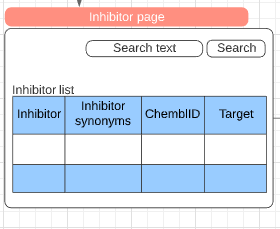

## Function to return all meta details of all inhibitors

In [16]:
inhibitors = s.query(InhibitorMeta).all()
for inhibitor in inhibitors:
    pprint(inhibitor.to_dict())

{'chembl_id': ' CHEMBL3301610',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Abemaciclib.svg',
 'inchi': 'UZWDCWONPYILKI-UHFFFAOYSA-N',
 'inhibitor_aliases': ['Verzenio', 'Abemaciclib', 'LY-2835219'],
 'inhibitor_id': 1,
 'inhibitor_name': 'Abemaciclib',
 'kinases': [{'gene_alias': ['CDK4'], 'gene_name': 'CDK4'}],
 'molecular_weight': 506.3,
 'smiles': 'CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4)F)nc(n5C(C)C)C)F'}
{'chembl_id': ' CHEMBL3707348',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Acalabrutinib.svg',
 'inchi': 'WDENQIQQYWYTPO-IBGZPJMESA-N',
 'inhibitor_aliases': ['Calquence', 'ACP-196', 'Acalabrutinib'],
 'inhibitor_id': 2,
 'inhibitor_name': 'Acalabrutinib',
 'kinases': [{'gene_alias': ['BTK', 'AGMX1', 'ATK', 'BPK'],
              'gene_name': 'BTK'}],
 'molecular_weight': 465.2,
 'smiles': 'CC#CC(=O)N1CCC[C@H]1c2nc(c3n2ccnc3N)c4ccc(cc4)C(=O)Nc5ccccn5'}
{'chembl_id': ' CHEMBL3545397',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Acalisi

{'chembl_id': ' CHEMBL1879463',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Dactolisib.svg',
 'inchi': 'JOGKUKXHTYWRGZ-UHFFFAOYSA-N',
 'inhibitor_aliases': ['Dactolisib', 'NVP-BEZ235-NX', 'BEZ-235', 'NVP-BEZ235'],
 'inhibitor_id': 43,
 'inhibitor_name': 'Dactolisib',
 'kinases': [{'gene_alias': ['PIK3CA'], 'gene_name': 'PIK3CA'}],
 'molecular_weight': 469.2,
 'smiles': 'CC(C)(C#N)c1ccc(cc1)n2c3c4cc(ccc4ncc3n(c2=O)C)c5cc6ccccc6nc5'}
{'chembl_id': ' CHEMBL402548',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Danusertib.svg',
 'inchi': 'XKFTZKGMDDZMJI-HSZRJFAPSA-N',
 'inhibitor_aliases': ['Danusertib', 'PHA-739358'],
 'inhibitor_id': 44,
 'inhibitor_name': 'Danusertib',
 'kinases': [{'gene_alias': ['AURKA',
                             'AIK',
                             'AIRK1',
                             'ARK1',
                             'AURA',
                             'AYK1',
                             'BTAK',
                             'IAK1',
  

{'chembl_id': ' CHEMBL1091644',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Linsitinib.svg',
 'inchi': 'PKCDDUHJAFVJJB-VLZXCDOPSA-N',
 'inhibitor_aliases': ['Linsitinib', 'ASP-7487', 'OSI-906', 'OSI-906AA'],
 'inhibitor_id': 88,
 'inhibitor_name': 'Linsitinib',
 'kinases': [{'gene_alias': ['IGF1R'], 'gene_name': 'IGF1R'}],
 'molecular_weight': 421.2,
 'smiles': 'C[C@]1(C[C@@H](C1)c2n3c(c(ncc3)N)c(n2)c4cc5nc(ccc5cc4)c6ccccc6)O'}
{'chembl_id': ' CHEMBL3286830',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Lorlatinib.svg',
 'inchi': 'IIXWYSCJSQVBQM-LLVKDONJSA-N',
 'inhibitor_aliases': ['Lorlatinib', 'PF-06463922'],
 'inhibitor_id': 89,
 'inhibitor_name': 'Lorlatinib',
 'kinases': [{'gene_alias': ['ALK'], 'gene_name': 'ALK'}],
 'molecular_weight': 406.2,
 'smiles': 'C[C@@H]1c2cc(ccc2C(=O)N(Cc3c(c(n(n3)C)C#N)-c4cc(c(nc4)N)O1)C)F'}
{'chembl_id': ' CHEMBL1088752',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Losmapimod.svg',
 'inchi': 'KKYABQBFGDZVNQ-UHFFF

{'chembl_id': ' CHEMBL3813873',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Pexidartinib.svg',
 'inchi': 'JGWRKYUXBBNENE-UHFFFAOYSA-N',
 'inhibitor_aliases': ['CML-261', 'Pexidartinib', 'PLX3397'],
 'inhibitor_id': 115,
 'inhibitor_name': 'Pexidartinib',
 'kinases': [{'gene_alias': ['FLT3', 'CD135', 'FLK2'], 'gene_name': 'FLT3'}],
 'molecular_weight': 417.1,
 'smiles': 'c1cc(ncc1Cc2c[nH]c3c2cc(cn3)Cl)NCc4ccc(nc4)C(F)(F)F'}
{'chembl_id': ' CHEMBL3991932',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Pexmetinib.svg',
 'inchi': 'LNMRSSIMGCDUTP-UHFFFAOYSA-N',
 'inhibitor_aliases': ['Pexmetinib'],
 'inhibitor_id': 116,
 'inhibitor_name': 'Pexmetinib',
 'kinases': [{'gene_alias': ['MAPK14',
                             'CSBP',
                             'CSBP1',
                             'CSBP2',
                             'CSPB1',
                             'MXI2',
                             'SAPK2A'],
              'gene_name': 'MAPK14'}],
 'molecular_we

{'chembl_id': ' CHEMBL2103882',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Tivantinib.svg',
 'inchi': 'UCEQXRCJXIVODC-PMACEKPBSA-N',
 'inhibitor_aliases': ['ARQ-197', 'Tivantinib'],
 'inhibitor_id': 164,
 'inhibitor_name': 'Tivantinib',
 'kinases': [{'gene_alias': ['MET'], 'gene_name': 'MET'}],
 'molecular_weight': 369.1,
 'smiles': 'c1ccc2c(c1)c(c[nH]2)[C@H]3[C@@H](C(=O)NC3=O)c4cn5c6c4cccc6CCC5'}
{'chembl_id': ' CHEMBL1289494',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Tivozanib.svg',
 'inchi': 'SPMVMDHWKHCIDT-UHFFFAOYSA-N',
 'inhibitor_aliases': ['AV-951',
                       'Tivozanib',
                       'Kil-8951',
                       'Kil8951',
                       'ASP-4130',
                       'KRN-951'],
 'inhibitor_id': 165,
 'inhibitor_name': 'Tivozanib',
 'kinases': [{'gene_alias': ['FLT1', 'FLT', 'FRT', 'VEGFR1'],
              'gene_name': 'FLT1'}],
 'molecular_weight': 454.1,
 'smiles': 'Cc1cc(no1)NC(=O)Nc2ccc(cc2Cl)Oc3ccnc4c

In [19]:
#Might need to change this
def get_all_inhibitors_meta():
    """
    Return all the meta details of every inhibitor in a list of dictionary.
    >> get_all_inhibitors_meta()
    [{'inhibitor_id': 1,
    'inhibitor_name': 'Abemaciclib',
    'molecular_weight': 506.3,
    'smiles': 'CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4)F)nc(n5C(C)C)C)F',
    'inchi': 'UZWDCWONPYILKI-UHFFFAOYSA-N',
    'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Abemaciclib.svg',
    'kinases': [{'gene_name': 'CDK4', 'gene_alias': ['CDK4']},{'gene_name': 'CDK6', 'gene_alias': ['CDK6', 'CDKN6']}],
    'inhibitor_aliases': ['Verzenio', 'Abemaciclib', 'LY-2835219'],
    'chembl_id': ' CHEMBL3301610'},
    """
    results = []
    inhibitors = s.query(InhibitorMeta).all() #query for all the inhibitors meta within the inhibitor_meta table
    for inhibitor in inhibitors:  #loop through the inhibitor object in the list
        results.append(inhibitor.to_dict()) #append the meta detail of each inhibitor as a dictionary to the list
    return results
get_all_inhibitors_meta()

[{'inhibitor_id': 1,
  'inhibitor_name': 'Abemaciclib',
  'molecular_weight': 506.3,
  'smiles': 'CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4)F)nc(n5C(C)C)C)F',
  'inchi': 'UZWDCWONPYILKI-UHFFFAOYSA-N',
  'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Abemaciclib.svg',
  'kinases': [{'gene_name': 'CDK4', 'gene_alias': ['CDK4']},
   {'gene_name': 'CDK6', 'gene_alias': ['CDK6', 'CDKN6']}],
  'inhibitor_aliases': ['Verzenio', 'Abemaciclib', 'LY-2835219'],
  'chembl_id': ' CHEMBL3301610'},
 {'inhibitor_id': 2,
  'inhibitor_name': 'Acalabrutinib',
  'molecular_weight': 465.2,
  'smiles': 'CC#CC(=O)N1CCC[C@H]1c2nc(c3n2ccnc3N)c4ccc(cc4)C(=O)Nc5ccccn5',
  'inchi': 'WDENQIQQYWYTPO-IBGZPJMESA-N',
  'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Acalabrutinib.svg',
  'kinases': [{'gene_name': 'BTK',
    'gene_alias': ['BTK', 'AGMX1', 'ATK', 'BPK']}],
  'inhibitor_aliases': ['Calquence', 'ACP-196', 'Acalabrutinib'],
  'chembl_id': ' CHEMBL3707348'},
 {'inhibitor_id': 3,
  'inh

## Function to return all the inhibitor meta data from an inhibitor

The following section is for the following page.

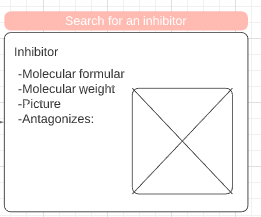

In [18]:
inhibitors = s.query(InhibitorMeta).all()
for inhibitor in inhibitors:
    pprint(inhibitor.to_dict())

{'chembl_id': ' CHEMBL3301610',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Abemaciclib.svg',
 'inchi': 'UZWDCWONPYILKI-UHFFFAOYSA-N',
 'inhibitor_aliases': ['Verzenio', 'Abemaciclib', 'LY-2835219'],
 'inhibitor_id': 1,
 'inhibitor_name': 'Abemaciclib',
 'kinases': [{'gene_alias': ['CDK4'], 'gene_name': 'CDK4'}],
 'molecular_weight': 506.3,
 'smiles': 'CCN1CCN(CC1)Cc2ccc(nc2)Nc3ncc(c(n3)c4cc5c(c(c4)F)nc(n5C(C)C)C)F'}
{'chembl_id': ' CHEMBL3707348',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Acalabrutinib.svg',
 'inchi': 'WDENQIQQYWYTPO-IBGZPJMESA-N',
 'inhibitor_aliases': ['Calquence', 'ACP-196', 'Acalabrutinib'],
 'inhibitor_id': 2,
 'inhibitor_name': 'Acalabrutinib',
 'kinases': [{'gene_alias': ['BTK', 'AGMX1', 'ATK', 'BPK'],
              'gene_name': 'BTK'}],
 'molecular_weight': 465.2,
 'smiles': 'CC#CC(=O)N1CCC[C@H]1c2nc(c3n2ccnc3N)c4ccc(cc4)C(=O)Nc5ccccn5'}
{'chembl_id': ' CHEMBL3545397',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Acalisi

 'kinases': [{'gene_alias': ['EGFR', 'ERBB', 'ERBB1', 'HER1'],
              'gene_name': 'EGFR'}],
 'molecular_weight': 580.1,
 'smiles': 'CS(=O)(=O)CCNCc1ccc(o1)c2ccc3c(c2)c(ncn3)Nc4ccc(c(c4)Cl)OCc5cccc(c5)F'}
{'chembl_id': ' CHEMBL3889654',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Larotrectinib.svg',
 'inchi': 'NYNZQNWKBKUAII-KBXCAEBGSA-N',
 'inhibitor_aliases': ['Larotrectinib', 'LOXO-101'],
 'inhibitor_id': 84,
 'inhibitor_name': 'Larotrectinib',
 'kinases': [{'gene_alias': ['NTRK1', 'MTC', 'TRK', 'TRKA'],
              'gene_name': 'NTRK1'}],
 'molecular_weight': 428.2,
 'smiles': 'c1cc(c(cc1F)[C@H]2CCCN2c3ccn4c(n3)c(cn4)NC(=O)N5CC[C@@H](C5)O)F'}
{'chembl_id': ' CHEMBL1289601',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Lenvatinib.svg',
 'inchi': 'WOSKHXYHFSIKNG-UHFFFAOYSA-N',
 'inhibitor_aliases': ['Lenvima;Kisplyx', 'ER-203492-00', 'Lenvatinib'],
 'inhibitor_id': 85,
 'inhibitor_name': 'Lenvatinib',
 'kinases': [{'gene_alias': ['FLT1', 'FLT', 'FRT'

 'inhibitor_aliases': ['AZD-2014', 'AZD2014', 'Vistusertib'],
 'inhibitor_id': 179,
 'inhibitor_name': 'Vistusertib',
 'kinases': [{'gene_alias': ['MTOR',
                             'FRAP',
                             'FRAP1',
                             'FRAP2',
                             'RAFT1',
                             'RAPT1'],
              'gene_name': 'MTOR'}],
 'molecular_weight': 462.2,
 'smiles': 'C[C@H]1COCCN1c2c3ccc(nc3nc(n2)N4CCOC[C@@H]4C)c5cccc(c5)C(=O)NC'}
{'chembl_id': ' CHEMBL1233528',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Volasertib.svg',
 'inchi': 'SXNJFOWDRLKDSF-STROYTFGSA-N',
 'inhibitor_aliases': ['BI-6727', 'Volasertib'],
 'inhibitor_id': 180,
 'inhibitor_name': 'Volasertib',
 'kinases': [{'gene_alias': ['PLK1', 'PLK'], 'gene_name': 'PLK1'}],
 'molecular_weight': 618.4,
 'smiles': 'CC[C@H]1N(c2nc(ncc2N(C1=O)C)Nc3c(cc(cc3)C(=O)N[C@H]4CC[C@@H](CC4)N5CCN(CC5)CC6CC6)OC)C(C)C'}
{'chembl_id': ' CHEMBL3905910',
 'images_url': ' http://www.i

In [21]:
#function to return all the meta details of an inhibitor when query for an inhibitor
def get_inhibitor_meta_from_inhibitor(inhibitor_entry):
    """(str) --> dict
    Returns the meta data of the inhibitor.
    The inhibitor can be the actual name or the alias of the inhibitor. 
    Raises an error if the entry is not found. 
    >> get_inhibitor_meta_from_inhibitor("Afatinib")
    {'inhibitor_id': 6,
    'inhibitor_name': 'Afatinib',
    'molecular_weight': 485.2,
    'smiles': 'CN(C)C/C=C/C(=O)Nc1cc2c(cc1O[C@H]3CCOC3)ncnc2Nc4ccc(c(c4)Cl)F',
    'inchi': 'ULXXDDBFHOBEHA-CWDCEQMOSA-N',
    'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Afatinib.svg',
    'kinases': [{'gene_name': 'EGFR','gene_alias': ['EGFR', 'ERBB', 'ERBB1', 'HER1']},
    {'gene_name': 'ERBB2','gene_alias': ['ERBB2', 'HER2', 'MLN19', 'NEU', 'NGL']},
    {'gene_name': 'ERBB4', 'gene_alias': ['ERBB4', 'HER4']}],
    'inhibitor_aliases': ['Giotrif;Gilotrif', 'Afatinib', 'BIBW-2992'],
    'chembl_id': ' CHEMBL1173655'}
    """
    #search in InhibitorMeta through InhibitorName for entry that matches the name of the query
    inhibitor_query = s.query(InhibitorMeta).join(InhibitorName).filter(InhibitorMeta.inhibitor_name==InhibitorName.inhibitor_name).\
    filter(InhibitorName.inhibitor_alias==inhibitor_entry).one()
    return inhibitor_query.to_dict()
get_inhibitor_meta_from_inhibitor("Afatinib")

{'inhibitor_id': 6,
 'inhibitor_name': 'Afatinib',
 'molecular_weight': 485.2,
 'smiles': 'CN(C)C/C=C/C(=O)Nc1cc2c(cc1O[C@H]3CCOC3)ncnc2Nc4ccc(c(c4)Cl)F',
 'inchi': 'ULXXDDBFHOBEHA-CWDCEQMOSA-N',
 'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Afatinib.svg',
 'kinases': [{'gene_name': 'EGFR',
   'gene_alias': ['EGFR', 'ERBB', 'ERBB1', 'HER1']},
  {'gene_name': 'ERBB2',
   'gene_alias': ['ERBB2', 'HER2', 'MLN19', 'NEU', 'NGL']},
  {'gene_name': 'ERBB4', 'gene_alias': ['ERBB4', 'HER4']}],
 'inhibitor_aliases': ['Giotrif;Gilotrif', 'Afatinib', 'BIBW-2992'],
 'chembl_id': ' CHEMBL1173655'}

## Function to return the meta details of inhibitor from a gene

This is an extra function in case the team needs them.

In [4]:
kinase="MAPK1"
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
filter(KinaseGeneName.gene_alias==kinase).all()

for inhibitor in kinase_query[-1].inhibitors:
    pprint(inhibitor.to_dict())

TypeError: 'KinaseGeneMeta' object is not iterable

In [24]:
#This function might not be needed
def get_inhibitor_meta_from_gene(kinase):
    """
    Take in a kinase gene name and return a list of dictionaries.
    Returns empty list if there is not inhibitor for the kinase.
    >> kinase = "MAPK1"
    >> get_inhibitor_meta_from_gene(kinase)
    [{'inhibitor_id': 172,
    'inhibitor_name': 'Ulixertinib',
    'molecular_weight': 432.1,
    'smiles': 'CC(C)Nc1cc(c(cn1)Cl)c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3)Cl',
    'inchi': 'KSERXGMCDHOLSS-LJQANCHMSA-N',
    'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Ulixertinib.svg',
    'kinases': [{'gene_name': 'MAPK1',
    'gene_alias': ['MAPK1', 'ERK2', 'PRKM1', 'PRKM2']}],
    'inhibitor_aliases': ['VRT752271VRT-752271BVD-523', 'Ulixertinib'],
    'chembl_id': ' CHEMBL3590106'}]
    """
    results = []
    #query for the kinase object using either the gene name, gene alias, uniprot number or uniprot entry name
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
    filter(or_(KinaseGeneName.gene_alias==kinase, KinaseGeneMeta.uniprot_number==kinase,\
               KinaseGeneMeta.uniprot_entry==kinase)).all()
    #if no entry was found, an empty list will be returned
    if kinase_query == []:
        return []
    #loop through the list of inhibitors stored with the KinaseGeneMeta obj
    for inhibitor in kinase_query[-1].inhibitors:
        results.append(inhibitor.to_dict())
    return results

# kinase="SGK1"
kinase = "MAPK1"
# kinase = "empty"
get_inhibitor_meta_from_gene(kinase)

[{'inhibitor_id': 172,
  'inhibitor_name': 'Ulixertinib',
  'molecular_weight': 432.1,
  'smiles': 'CC(C)Nc1cc(c(cn1)Cl)c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3)Cl',
  'inchi': 'KSERXGMCDHOLSS-LJQANCHMSA-N',
  'images_url': ' http://www.icoa.fr/pkidb/static/img/mol/Ulixertinib.svg',
  'kinases': [{'gene_name': 'MAPK1',
    'gene_alias': ['MAPK1', 'ERK2', 'PRKM1', 'PRKM2']}],
  'inhibitor_aliases': ['VRT752271VRT-752271BVD-523', 'Ulixertinib'],
  'chembl_id': ' CHEMBL3590106'}]

# Returning kinase for the substrate-phospho-inhibitor analysis page

The following section is for the following page.

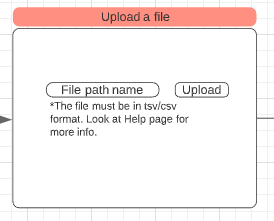

## Dummy dataframe.

In [10]:
#making a dummy test list
import pandas as pd
sub_pho_df = pd.read_csv("new_clean_human_kinase_substrates.csv", index_col=0)
sub_pho_df.tail()

,GENE,KINASE,KIN_ACC_ID,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,SUB_ENTRY_NAME,KIN_ENTRY_NAME
10975,NUAK1,NuaK1,O60285,MYPT1,4659.0,O14974,PPP1R12A,S910,1983104,sLLGRsGsysyLEER,NaN,MYPT1_HUMAN,NUAK1_HUMAN
10976,NUAK1,NuaK1,O60285,LATS1,9113.0,O95835,LATS1,S464,451855,NIPVRsNsFNNPLGN,NaN,LATS1_HUMAN,NUAK1_HUMAN
10977,ULK2,ULK2,Q8IYT8,SEC16A,9919.0,O15027,SEC16A,S846,55578720,LAQPINFsVSLSNSH,NaN,SC16A_HUMAN,ULK2_HUMAN
10978,ULK2,ULK2,Q8IYT8,DENND3,22898.0,A2RUS2,DENND3,S472,7997148,THRRMVVsMPNLQDI,NaN,DEND3_HUMAN,ULK2_HUMAN
10979,ULK2,ULK2,Q8IYT8,DENND3,22898.0,A2RUS2,DENND3,S490,23050193,ELAPRNSsLRLtDTA,NaN,DEND3_HUMAN,ULK2_HUMAN


In [11]:
#pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
dummy_df = pd.concat([sub_pho_df["SUB_GENE"], sub_pho_df["SUB_MOD_RSD"]], axis=1, keys=["substrate", "phosphosite"])
dummy_df.head()

,substrate,phosphosite
0,EIF2S1,S52
1,EIF2S1,S49
2,HDAC5,S259
3,PTPRA,S204
4,HNRNPK,S302


In [12]:
results = []
for i in range(len(dummy_df)):
    tmp = {
        dummy_df.iloc[i]["substrate"]: dummy_df.iloc[i]["phosphosite"]
    }
    results.append(tmp)
results

[{'EIF2S1': 'S52'},
 {'EIF2S1': 'S49'},
 {'HDAC5': 'S259'},
 {'PTPRA': 'S204'},
 {'HNRNPK': 'S302'},
 {'SHOC2': 'T71'},
 {'BLVRA': 'S237'},
 {'MUC1': 'T1224'},
 {'ADD1': 'S726'},
 {'NCF1': 'S370'},
 {'FBXO25': 'S178'},
 {'ENOX2': 'S504'},
 {'TNNI3': 'T143'},
 {'FOSL1': 'T217'},
 {'BEST1': 'S358'},
 {'RPS6KB2': 'S473'},
 {'NCF1': 'S303'},
 {'CARD9': 'T231'},
 {'ITGB2': 'T758'},
 {'PRKCD': 'T218'},
 {'LCP1': 'S5'},
 {'TRPV4': 'S162'},
 {'SQSTM1': 'S349'},
 {'KRT8': 'S74'},
 {'GAPDH': 'T246'},
 {'NRG1': 'S286'},
 {'NCF1': 'S328'},
 {'DAP3': 'S31'},
 {'STAT1': 'S727'},
 {'PRKCD': 'S503'},
 {'RPS6': 'S235'},
 {'ITGB2': 'S745'},
 {'PRKCD': 'S299'},
 {'SLC29A1': 'S281'},
 {'DAP3': 'S280'},
 {'CTTN': 'S405'},
 {'DAB2': 'S24'},
 {'PTPN22': 'S35'},
 {'PRKD1': 'S742'},
 {'PRKCD': 'S302'},
 {'BLVRA': 'S230'},
 {'PRKCD': 'S645'},
 {'DAP3': 'T237'},
 {'PRKCD': 'S304'},
 {'PRKCD': 'T295'},
 {'SMPD1': 'S510'},
 {'HIST1H3A': 'T45'},
 {'CHAT': 'S476'},
 {'CYBA': 'T147'},
 {'PTPRA': 'S180'},
 {'TP53': 'S

In [18]:
res = {}
for dict in results:
    for key in dict.keys():
        if key in res:
            res[key].append(dict[key])
        else:
            res[key] = [dict[key]]
pprint(res)

{nan: ['S77',
       'T9',
       'S438',
       'S455',
       'S438',
       'S234',
       'T783',
       'S436',
       'S427',
       'S446',
       'S427',
       'S108',
       'S161',
       'S350',
       'T347',
       'S357',
       'S350',
       'T347',
       'S357',
       'S39',
       'Y74'],
 'AAK1': ['T389'],
 'AARS2': ['T673'],
 'AATF': ['T366', 'S510', 'S143', 'S477', 'S189'],
 'ABCA1': ['S1255', 'T1243', 'T1242', 'S1042', 'S2054', 'S2054'],
 'ABCB1': ['S667', 'S671', 'S683', 'S661', 'S667', 'S671'],
 'ABCC1': ['T249'],
 'ABCF1': ['S140', 'S109'],
 'ABCG2': ['T362'],
 'ABI1': ['S410',
          'T394',
          'S392',
          'S216',
          'T265',
          'S183',
          'S225',
          'S267',
          'S216',
          'Y213',
          'S410',
          'T394',
          'S392',
          'S216',
          'T265',
          'S183',
          'S225',
          'S267'],
 'ABL1': ['Y488',
          'T735',
          'Y393',
          'Y412',
        

 'FXN': ['Y118'],
 'FXR1': ['S420'],
 'FXYD1': ['S83', 'S88', 'S83', 'S88', 'T89'],
 'FYB1': ['Y651',
          'Y625',
          'Y771',
          'Y559',
          'Y595',
          'Y755',
          'Y757',
          'Y571',
          'Y780'],
 'FYN': ['Y28',
         'S21',
         'Y531',
         'Y30',
         'Y28',
         'Y39',
         'Y214',
         'Y185',
         'Y213',
         'Y420',
         'Y420'],
 'FYTTD1': ['T205'],
 'FZR1': ['S40', 'S163', 'T121', 'S151', 'S40', 'S163', 'T121'],
 'G3BP1': ['S149', 'Y133', 'Y56'],
 'G6PD': ['S210', 'T266', 'Y507', 'Y428'],
 'GAB1': ['Y242',
          'Y373',
          'Y317',
          'Y627',
          'Y259',
          'T476',
          'Y627',
          'Y242',
          'Y447',
          'Y472',
          'Y659',
          'Y373',
          'Y285',
          'Y589',
          'Y627',
          'Y406',
          'Y447',
          'Y472',
          'Y659',
          'Y373',
          'Y285',
          'Y589',
          

 'PCBP2': ['S272', 'S173', 'S189', 'T213', 'S272', 'S173', 'S189', 'T213'],
 'PCF11': ['S120', 'T121'],
 'PCGF6': ['S30'],
 'PCM1': ['S372'],
 'PCNA': ['Y133', 'Y250', 'Y60', 'Y211'],
 'PCNT': ['T1221', 'S1241', 'T1209', 'S1235'],
 'PDCD10': ['T43', 'S39', 'T43', 'S39'],
 'PDCD4': ['S457', 'S76', 'S67', 'S67', 'S457'],
 'PDCD5': ['S119'],
 'PDCL': ['S296', 'S25', 'S19', 'S18', 'S20'],
 'PDE10A': ['T16'],
 'PDE11A': ['S117', 'S162'],
 'PDE3A': ['S428',
           'S312',
           'S292',
           'S428',
           'S293',
           'S312',
           'S438',
           'S492',
           'S465'],
 'PDE3B': ['S318', 'S296', 'S73'],
 'PDE4A': ['S145'],
 'PDE4B': ['S133', 'S659', 'S487'],
 'PDE4C': ['S13', 'S535'],
 'PDE4D': ['S13', 'S126', 'S126', 'S54', 'S579', 'S490', 'S413', 'S579'],
 'PDE5A': ['S102', 'S102'],
 'PDGFRA': ['Y754', 'Y1018', 'Y988', 'Y572', 'Y574'],
 'PDGFRB': ['Y1021',
            'Y1009',
            'Y579',
            'Y562',
            'Y740',
            'Y7

 'THRAP3': ['Y344', 'Y107', 'Y68', 'Y118', 'T874'],
 'THRB': ['S142', 'Y406', 'S142'],
 'TIAM1': ['S329', 'S334', 'T340', 'S231'],
 'TICAM2': ['S16'],
 'TICRR': ['T1898', 'S1045', 'S865', 'S1894', 'S1001', 'T969'],
 'TIFA': ['T9', 'T9'],
 'TIGIT': ['Y225', 'Y225'],
 'TINF2': ['S396', 'S295', 'S330'],
 'TIRAP': ['Y106', 'Y187', 'Y86'],
 'TK1': ['S13', 'S13'],
 'TKT': ['T382', 'S387'],
 'TLE1': ['S239', 'S253'],
 'TLK1': ['S743', 'S679'],
 'TLK2': ['S686'],
 'TLN1': ['S425'],
 'TLR3': ['Y759', 'Y858'],
 'TLR4': ['S790'],
 'TLR5': ['S805'],
 'TMEM173': ['S358', 'S366'],
 'TMIGD2': ['S220'],
 'TMOD1': ['S2', 'T54'],
 'TMPO': ['S424'],
 'TNFAIP1': ['S278', 'S280'],
 'TNFAIP3': ['S381'],
 'TNFRSF1A': ['S381'],
 'TNK1': ['S502'],
 'TNK2': ['Y635', 'Y860', 'Y859', 'Y284'],
 'TNKS': ['T982', 'S978', 'S991', 'S987'],
 'TNKS1BP1': ['S691'],
 'TNNI3': ['T143',
           'S23',
           'S24',
           'S23',
           'S150',
           'S24',
           'S39',
           'S23',
           '

## Function to return a kinase using a substrate and a phosphosite

The following code documents how I get to the functions to return a kinase when given a substrate and a phosphosite. In progress.

In [ ]:
sub="PRKD3"
pho="S731"
sub_pho_query = s.query(SubstrateMeta).join(PhosphositeMeta).filter(or_(SubstrateMeta.substrate_name==sub,\
                                                                           SubstrateMeta.substrate_gene_name==sub,\
                                                                           SubstrateMeta.substrate_uniprot_entry==sub,\
                                                                           SubstrateMeta.substrate_uniprot_number==sub)).\
                                                                filter(and_(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id,\
                                                                           PhosphositeMeta.phosphosite==pho)).all()
# sub_pho_query
for row in sub_pho_query:
    for phosphosite in row.phosphosites:
        for item in phosphosite.kinases:
            pprint(item.gene_name)

In [ ]:
#working steps
sub="RRN3"
pho="T200"
sub_pho_query = s.query(SubstrateMeta).join(PhosphositeMeta).filter(or_(SubstrateMeta.substrate_name==sub,\
                                                                           SubstrateMeta.substrate_gene_name==sub,\
                                                                           SubstrateMeta.substrate_uniprot_entry==sub,\
                                                                           SubstrateMeta.substrate_uniprot_number==sub)).\
                                                                filter(and_(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id,\
                                                                           PhosphositeMeta.phosphosite==pho)).all()
sub_pho_query
# for row in sub_pho_query:
#     for phosphosite in row.phosphosites:
#         for item in phosphosite.kinases:
#             pprint(item.gene_name)

In [ ]:
#the following code returns a kinase when taking in a substrate and a phosphosite
sub="RRN3"
pho="T200"
sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
filter(SubstrateMeta.substrate_gene_name==sub).all()
for phosphosite in sub_pho_query:
    for kinase in phosphosite.kinases:
        print(kinase.gene_name)

In [54]:
#improving on the algorithm above
#the code now takes in either the substrate name, substrate gene name, substrate uniprot entry name, substrate entry number
#sub="RRN3"
#sub="TIF1A"
#sub="RRN3_HUMAN"
sub="Q9NYV6"
pho="T200"
sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
           SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
for phosphosite in sub_pho_query:
    for kinase in phosphosite.kinases:
        pprint(kinase.gene_name)

'CSNK2A1'


In [5]:
#MIGHT NEED TO CHANGE IT
#create a function that takes in two parameters: a substrate and a phosphosite number
#The function should return a kinase a string
def get_kinase_from_substrate_phosphosite(sub, pho):
    """
    Take in two parameters: a substrate and a phosphosite number.
    Substrate is either the substrate name, substrate gene name, substrate uniprot entry name, 
    substrate uniprot entry number.
    Return a kinase string.
    Returns empty list if there are no match found
    >> get_kinase_from_substrate_phosphosite("RRN3_HUMAN", "T200")
    CSNK2A1
    """
    results = []
    #get the PhosphositeMeta obj that has the Subtrate obj and the same phosphosite
    sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
    filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
               SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
    #if  there are no entry in database an empty list will be returned
    if sub_pho_query == []:
        return []
    #loop through the phosphosite obj
    for phosphosite in sub_pho_query:
        #loop through the kinases asociated with the phosphosite
        for kinase in phosphosite.kinases:
            results.append(kinase.gene_name)
    return results
print(get_kinase_from_substrate_phosphosite("RRN3_HUMAN", "T200"))
print(get_kinase_from_substrate_phosphosite("empty", "T200"))
print(get_kinase_from_substrate_phosphosite("RRN3", "empty"))
print(get_kinase_from_substrate_phosphosite("ABCF1", "S140"))
print(get_kinase_from_substrate_phosphosite("HDAC5", "S498"))

['MAPK9']
[]
[]
['CSNK2A1']
['CAMK1', 'CAMK2A', 'CAMK4', 'PRKAA1', 'PRKAA2', 'PRKD1', 'PRKD2', 'PRKD3']


## Function to return kinase with substrate and phosphosite

In [14]:
#WILL NEED TO CHANGE
#create a function that takes in substrate and phosphosite
#return a dictionary
#dictionary contains the kinase, substrate and phosphosite
def get_kinase_substrate_phosphosite(sub, pho):
    """(str, str) --> dictionary
    Take in two parameters: a substrate and a phosphosite number.
    Substrate is either the substrate name, substrate gene name, substrate uniprot entry name, 
    substrate uniprot entry number.
    Return a dictionary.
    Returns empty list if there are no match found.
    Each dictionary contains the kinase, substrate and phosphosite.
    >> get_kinase_substrate_phosphosite("RRN3_HUMAN", "T200")
    {'kinase': ['MAPK9'], 'substrate': 'RRN3_HUMAN', 'phosphosite': 'T200'}
    >> get_kinase_substrate_phosphosite("empty", "T200")
    []
    >> get_kinase_substrate_phosphosite("Q9UQL6", "S498")
    {'kinase': ['CAMK1', 'CAMK2A', 'CAMK4', 'PRKAA1', 'PRKAA2', 'PRKD1', 'PRKD2', 'PRKD3'], 
    'substrate': 'Q9UQL6', 
    'phosphosite': 'S498'}
    """
    tmp = {}
    #get the PhosphositeMeta obj that has the Subtrate obj and the same phosphosite
    sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
    filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
               SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
    #if  there are no entry in database an empty list will be returned
    if sub_pho_query == []:
        return []
    #loop through the phosphosite obj
    for phosphosite in sub_pho_query:
        kinase_list = []
        #loop through the kinases asociated with the phosphosite
        for kinase in phosphosite.kinases:
            #append the gene name of the kinase into a list
            kinase_list.append(kinase.gene_name)
        tmp["kinase"] = kinase_list
        tmp["substrate"] = sub
        tmp["phosphosite"] = pho
    return tmp
print(get_kinase_substrate_phosphosite("RRN3_HUMAN", "T200"))
print(get_kinase_substrate_phosphosite("empty", "T200"))
print(get_kinase_substrate_phosphosite("RRN3_HUMAN", "empty"))
print(get_kinase_substrate_phosphosite("Q9UQL6", "S498"))

{'kinase': ['MAPK9'], 'substrate': 'RRN3_HUMAN', 'phosphosite': 'T200'}
[]
[]
{'kinase': ['CAMK1', 'CAMK2A', 'CAMK4', 'PRKAA1', 'PRKAA2', 'PRKD1', 'PRKD2', 'PRKD3'], 'substrate': 'Q9UQL6', 'phosphosite': 'S498'}


In [12]:
sub = "HDAC5"
pho = "S498"
tmp = {}
#substrate of query could be substrate gene name, substrate name, substrate uniprot entry name or 
#substrate uniprot number
sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
           SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
#if  there are no entry in database an empty list will be returned
if sub_pho_query == []:
    print([])
for phosphosite in sub_pho_query:
#     pprint(dir(phosphosite))
    kinase_list = []
    for kinase in phosphosite.kinases:
        pprint(kinase.gene_name)
        kinase_list.append(kinase.gene_name)
#         kinase_list = []
#         tmp["kinase"] = kinase.gene_name
#         tmp["substrate"] = sub
#         tmp["phosphosite"] = pho
# tmp
kinase_list

'CAMK1'
'CAMK2A'
'CAMK4'
'PRKAA1'
'PRKAA2'
'PRKD1'
'PRKD2'
'PRKD3'


['CAMK1', 'CAMK2A', 'CAMK4', 'PRKAA1', 'PRKAA2', 'PRKD1', 'PRKD2', 'PRKD3']

# Phosphosite search

## Function to return all the chromosome

In [6]:
#get a list of the chromosome number
def get_all_chromosome(as_tuples=True):
    """
    Returns a list of all chromosome numbers.
    If a list of int are desired, set as_tuples=False. 
    >> get_all_chromosome()
    [(1, 1),(2, 2),(3, 3),...(21, 21),(22, 22),('Y', 'Y'),('X', 'X')]
    """
    chromosome_query = [x[0] for x in s.query(PhosphositeMeta.chromosome).all()] #return the obj in the query
    if as_tuples: #if as_tuples==True by default, ie if you want tuples
        return [(x, x) for x in set(chromosome_query)]
    return list(set(chromosome_query)) #otherwise, return result in a list with no tuples in
get_all_chromosome()

[(1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 ('X', 'X'),
 ('Y', 'Y')]

In [5]:
#get the list of karyotype band through the chromosome number
chromosome_number = 2
karyo_list = []
phosphosite_obj = s.query(PhosphositeMeta.karyotype_band).filter(PhosphositeMeta.chromosome==chromosome_number).all()
phosphosite_obj.sort()
list(set(phosphosite_obj))[:5]

[('q11.2'), ('q13'), ('p22.2'), ('q37.3'), ('q24.1')]

## Function to get the karyotype bands given the chromosome 

In [7]:
#get the karyotype given the chromosome number
def get_karyotype_through_chromosome(chromosome_number, as_tuples=True):
    """(str) --> list
    Returns a list of karyotype band given a chromosome number.
    If a list of int are desired, set as_tuples=False.
    >> get_karyotype_through_chromosome("2")
    [('p13.1', 'p13.1'),('p13.3', 'p13.3'),('p14', 'p14'),...]
    """
    phosphosite_obj = s.query(PhosphositeMeta.karyotype_band).filter(PhosphositeMeta.chromosome==chromosome_number).all()
    phosphosite_obj = list(set(x[0] for x in sorted(phosphosite_obj))) #removed duplications
    ordered_list = sorted(phosphosite_obj, key=lambda x: (not x.islower(),x)) #order them by alphabet
    if as_tuples: #ie if list of tuples is desired by default
        return [(x, x) for x in ordered_list]
    return ordered_list
get_karyotype_through_chromosome("2")

[('p13.1', 'p13.1'),
 ('p13.3', 'p13.3'),
 ('p14', 'p14'),
 ('p15', 'p15'),
 ('p16.1', 'p16.1'),
 ('p16.2', 'p16.2'),
 ('p21', 'p21'),
 ('p22.1', 'p22.1'),
 ('p22.2', 'p22.2'),
 ('p23.1', 'p23.1'),
 ('p23.3', 'p23.3'),
 ('p24.3', 'p24.3'),
 ('p25.1', 'p25.1'),
 ('p25.3', 'p25.3'),
 ('q11.1', 'q11.1'),
 ('q11.2', 'q11.2'),
 ('q13', 'q13'),
 ('q14.1', 'q14.1'),
 ('q14.3', 'q14.3'),
 ('q21.1', 'q21.1'),
 ('q22.1', 'q22.1'),
 ('q22.2', 'q22.2'),
 ('q23.3', 'q23.3'),
 ('q24.1', 'q24.1'),
 ('q24.2', 'q24.2'),
 ('q24.3', 'q24.3'),
 ('q31.1', 'q31.1'),
 ('q31.2', 'q31.2'),
 ('q31.3', 'q31.3'),
 ('q32.2', 'q32.2'),
 ('q33.1', 'q33.1'),
 ('q33.3', 'q33.3'),
 ('q34', 'q34'),
 ('q35', 'q35'),
 ('q36.1', 'q36.1'),
 ('q36.3', 'q36.3'),
 ('q37.1', 'q37.1'),
 ('q37.3', 'q37.3')]

In [ ]:
import string as str
test_list = get_karyotype_through_chromosome(2)
sorted(test_list, key=lambda x: (not x.islower(),x))

In [44]:
#return a list of phosphosites by chromosome and karyotype numbers
chromosome = 2
karyotype = "q35"
results = []
phosphosite_query = s.query(PhosphositeMeta).filter(PhosphositeMeta.chromosome==chromosome).\
filter(PhosphositeMeta.karyotype_band==karyotype).all()
for phosphosite in phosphosite_query:
    results.append("{}:{}".format(phosphosite.start_position, phosphosite.end_position))
results.sort()
results

['214780979:214780977',
 '216160126:216160128',
 '216160135:216160137',
 '216204355:216204357',
 '218479669:218479667',
 '219077338:219077336',
 '219227985:219227983',
 '219246713:219246715',
 '219246749:219246751',
 '219246752:219246754',
 '219418544:219418546',
 '219418556:219418558',
 '219418640:219418642',
 '219418688:219418690',
 '219418691:219418693']

## Function to return a list of phosphosites given the chromosome and karyotype

In [8]:
#create a function to return a list of phosphosites
def get_location_through_chromosome_karyotype(chromosome_input, karyotype_input, as_tuples=True):
    """(str, str) --> list
    Returns a list of phosphosphosite location by taking in the chromosome number, karyotype number.
    Returns empty list if there is no location.
    If a list of int are desired, set as_tuples=False.
    >> get_location_through_chromosome_karyotype(2, "q35")
    [('214780979:214780977', '214780979:214780977'),('216160126:216160128', '216160126:216160128'),
    ('216160135:216160137', '216160135:216160137'),
    """
    results = []
    phosphosite_query = s.query(PhosphositeMeta).filter(PhosphositeMeta.chromosome==chromosome_input).\
    filter(PhosphositeMeta.karyotype_band==karyotype_input).all() #search for the phosphosites with the chro and karyo
    if phosphosite_query==[]: #if no match found
        return []
    for phosphosite in phosphosite_query: #loop through the results if any
        results.append("{}:{}".format(phosphosite.start_position, phosphosite.end_position)) #append the start and end co into a list
    results.sort()
    if as_tuples: #if list of tuples (default) is desired
        return [(x,x) for x in results]
    return results
get_location_through_chromosome_karyotype(2, "q35")

[('214780979:214780977', '214780979:214780977'),
 ('216160126:216160128', '216160126:216160128'),
 ('216160135:216160137', '216160135:216160137'),
 ('216204355:216204357', '216204355:216204357'),
 ('218479669:218479667', '218479669:218479667'),
 ('219077338:219077336', '219077338:219077336'),
 ('219227985:219227983', '219227985:219227983'),
 ('219246713:219246715', '219246713:219246715'),
 ('219246749:219246751', '219246749:219246751'),
 ('219246752:219246754', '219246752:219246754'),
 ('219418544:219418546', '219418544:219418546'),
 ('219418556:219418558', '219418556:219418558'),
 ('219418640:219418642', '219418640:219418642'),
 ('219418688:219418690', '219418688:219418690'),
 ('219418691:219418693', '219418691:219418693')]

In [10]:
get_karyotype_through_chromosome(7)
get_location_through_chromosome_karyotype(7, "q34")

[('139715954:139715952', '139715954:139715952'),
 ('140734713:140734711', '140734713:140734711'),
 ('140781672:140781670', '140781672:140781670'),
 ('140783134:140783132', '140783134:140783132'),
 ('141743674:141743676', '141743674:141743676'),
 ('142871781:142871779', '142871781:142871779'),
 ('143292692:143292694', '143292692:143292694'),
 ('143382608:143382610', '143382608:143382610')]

## Function to return a list of substrates with phosphosites and the phosphorylating kinase through a combination of the inputs

In [36]:
#Mk1
chromosome_input = 3
karyotype_input = None
results = []
if karyotype_input==None:
    phosphosite_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.chromosome==chromosome_input).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).all()
    for phosphosite in phosphosite_query:
        tmp = {}
        tmp["Substrate gene"]=phosphosite.substrate.substrate_gene_name
        tmp["Kinase"] = []
        for kinase in phosphosite.kinases:
            tmp["Kinase"].append(kinase.gene_name)
        results.append(tmp)
pprint(results[:5])

[{'Kinase': ['PRKCD'], 'Substrate gene': 'PRKCD'},
 {'Kinase': ['PRKCD'], 'Substrate gene': 'PRKCD'},
 {'Kinase': ['PRKCD'], 'Substrate gene': 'PRKCD'},
 {'Kinase': ['PRKCD'], 'Substrate gene': 'PRKCD'},
 {'Kinase': ['PRKCD'], 'Substrate gene': 'PRKCD'}]


In [44]:
#Mk2
chromosome_input = 3
karyotype_input = None
results = []
if karyotype_input==None:
    phosphosite_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.chromosome==chromosome_input).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).all()
    for phosphosite_obj in phosphosite_query:
        pprint("substrate gene:{}".format(phosphosite_obj.substrate.substrate_gene_name))
        pprint("substrate name:{}".format(phosphosite_obj.substrate.substrate_name))
        pprint("phosphosite:{}".format(phosphosite_obj.phosphosite))
        pprint("chromosome:{}".format(phosphosite_obj.chromosome))
        pprint("karyotype:{}".format(phosphosite_obj.karyotype_band))
        pprint("strand:{}".format(phosphosite_obj.strand))
        pprint("start:{}".format(phosphosite_obj.start_position))
        pprint("end:{}".format(phosphosite_obj.end_position))
        pprint("neighbouring sequences:{}".format(phosphosite_obj.neighbouring_sequences))
        tmp_list =[]
        for kinase in phosphosite.kinases:
            tmp_list.append(kinase.gene_name)
        pprint("kinases:{}".format(tmp_list))
#         results.append(tmp)
# pprint(results)

'substrate gene:PRKCD'
'substrate name:PKCD'
'phosphosite:T218'
'chromosome:3'
'karyotype:p21.1'
'strand:1'
'start:53183201'
'end:53183203'
'neighbouring sequences:TAANSRDtIFQkERF'
"kinases:['AKT1']"
'substrate gene:PRKCD'
'substrate name:PKCD'
'phosphosite:S503'
'chromosome:3'
'karyotype:p21.1'
'strand:1'
'start:53188811'
'end:53188813'
'neighbouring sequences:kENIFGEsRAstFCG'
"kinases:['AKT1']"
'substrate gene:PRKCD'
'substrate name:PKCD'
'phosphosite:S299'
'chromosome:3'
'karyotype:p21.1'
'strand:1'
'start:53185610'
'end:53185612'
'neighbouring sequences:NQVtQRAsRRsDsAs'
"kinases:['AKT1']"
'substrate gene:PRKCD'
'substrate name:PKCD'
'phosphosite:S302'
'chromosome:3'
'karyotype:p21.1'
'strand:1'
'start:53185619'
'end:53185621'
'neighbouring sequences:tQRAsRRsDsAssEP'
"kinases:['AKT1']"
'substrate gene:PRKCD'
'substrate name:PKCD'
'phosphosite:S645'
'chromosome:3'
'karyotype:p21.1'
'strand:1'
'start:53192168'
'end:53192170'
'neighbouring sequences:LNEkARLsysDKNLI'
"kinases:['AKT1']"


In [54]:
#MK3
#Mk2
chromosome_input = 3
karyotype_input = None
results = []
if karyotype_input==None:
    phosphosite_query = s.query(PhosphositeMeta).filter(PhosphositeMeta.chromosome==chromosome_input).all()
    for phosphosite_obj in phosphosite_query:
        tmp={}
        tmp["substrate gene"]=phosphosite_obj.substrate.substrate_gene_name
        tmp["substrate name"]=phosphosite_obj.substrate.substrate_name
        tmp["phosphosite"]=phosphosite_obj.phosphosite
        tmp["chromosome"]=phosphosite_obj.chromosome
        tmp["karyotype"]=phosphosite_obj.karyotype_band
        tmp["strand"]=phosphosite_obj.strand
        tmp["start"]=phosphosite_obj.start_position
        tmp["end"]=phosphosite_obj.end_position
        tmp["neighbouring sequences"]=phosphosite_obj.neighbouring_sequences
        tmp["kinases"] =[]
        for kinase in phosphosite.kinases:
            tmp["kinases"].append(kinase.gene_name)
        results.append(tmp)
pprint(results)

[{'chromosome': 3,
  'end': 53183203,
  'karyotype': 'p21.1',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'TAANSRDtIFQkERF',
  'phosphosite': 'T218',
  'start': 53183201,
  'strand': 1,
  'substrate gene': 'PRKCD',
  'substrate name': 'PKCD'},
 {'chromosome': 3,
  'end': 53188813,
  'karyotype': 'p21.1',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'kENIFGEsRAstFCG',
  'phosphosite': 'S503',
  'start': 53188811,
  'strand': 1,
  'substrate gene': 'PRKCD',
  'substrate name': 'PKCD'},
 {'chromosome': 3,
  'end': 53185612,
  'karyotype': 'p21.1',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'NQVtQRAsRRsDsAs',
  'phosphosite': 'S299',
  'start': 53185610,
  'strand': 1,
  'substrate gene': 'PRKCD',
  'substrate name': 'PKCD'},
 {'chromosome': 3,
  'end': 53185621,
  'karyotype': 'p21.1',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'tQRAsRRsDsAssEP',
  'phosphosite': 'S302',
  'start': 53185619,
  'strand': 1,
  'substrate gene': 'PRKCD',
  'substrate name': 'PKCD

### Function to return data for the phosphosite using chromosome number

In [48]:
def get_sub_pho_from_chromosome(chromosome_input):
    """(str/int) --> list of dict
    Returns a list of dictionary.
    """
    results = []
    phosphosite_query = s.query(PhosphositeMeta).filter(PhosphositeMeta.chromosome==chromosome_input).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).all()
    for phosphosite_obj in phosphosite_query:
        tmp={}
        tmp["substrate gene"]=phosphosite_obj.substrate.substrate_gene_name
        tmp["substrate name"]=phosphosite_obj.substrate.substrate_name
        tmp["phosphosite"]=phosphosite_obj.phosphosite
        tmp["chromosome"]=phosphosite_obj.chromosome
        tmp["karyotype"]=phosphosite_obj.karyotype_band
        tmp["strand"]=phosphosite_obj.strand
        tmp["start"]=phosphosite_obj.start_position
        tmp["end"]=phosphosite_obj.end_position
        tmp["neighbouring sequences"]=phosphosite_obj.neighbouring_sequences
        tmp["kinases"] =[]
        for kinase in phosphosite.kinases:
            tmp["kinases"].append(kinase.gene_name)
        results.append(tmp)
    return results

### Function to return data for the phosphosite using chromosome number and karyotype

In [52]:
chromosome_input = 2
karyotype_input = "q35"
results = []
phosphosite_query = s.query(PhosphositeMeta).filter(and_(PhosphositeMeta.chromosome==chromosome_input,
                                                         PhosphositeMeta.karyotype_band==karyotype_input)).all()
for phosphosite_obj in phosphosite_query:
    tmp={}
    tmp["substrate gene"]=phosphosite_obj.substrate.substrate_gene_name
    tmp["substrate name"]=phosphosite_obj.substrate.substrate_name
    tmp["phosphosite"]=phosphosite_obj.phosphosite
    tmp["chromosome"]=phosphosite_obj.chromosome
    tmp["karyotype"]=phosphosite_obj.karyotype_band
    tmp["strand"]=phosphosite_obj.strand
    tmp["start"]=phosphosite_obj.start_position
    tmp["end"]=phosphosite_obj.end_position
    tmp["neighbouring sequences"]=phosphosite_obj.neighbouring_sequences
    tmp["kinases"] =[]
    for kinase in phosphosite.kinases:
        tmp["kinases"].append(kinase.gene_name)
    results.append(tmp)
pprint(results)

[{'chromosome': 2,
  'end': 219418690,
  'karyotype': 'q35',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'LRAsRLGttRtPssy',
  'phosphosite': 'T76',
  'start': 219418688,
  'strand': 1,
  'substrate gene': 'DES',
  'substrate name': 'desmin'},
 {'chromosome': 2,
  'end': 219246751,
  'karyotype': 'q35',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'AAQRCTIsyRAPELF',
  'phosphosite': 'S197',
  'start': 219246749,
  'strand': 1,
  'substrate gene': 'STK16',
  'substrate name': 'MPSK1'},
 {'chromosome': 2,
  'end': 219246754,
  'karyotype': 'q35',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'AQRCTIsyRAPELFS',
  'phosphosite': 'Y198',
  'start': 219246752,
  'strand': 1,
  'substrate gene': 'STK16',
  'substrate name': 'MPSK1'},
 {'chromosome': 2,
  'end': 219246715,
  'karyotype': 'q35',
  'kinases': ['AKT1'],
  'neighbouring sequences': 'EGSRQALtLQDWAAQ',
  'phosphosite': 'T185',
  'start': 219246713,
  'strand': 1,
  'substrate gene': 'STK16',
  'substrate name': 'MPS

### Function to return the substrate and phosphosite data given the user input chromosome number, karyotype band, location

In [53]:
phosphosite_location = '216160126:216160128'
phosphosite_input = phosphosite_location.split(":")[0]
phosphosite_input

'216160126'

In [63]:
chromosome_in = 2
karyotype_in = "q35"
phosphosite_location_in = '216160126:216160128'
start_location = phosphosite_location_input.split(":")[0]
phosphosite_input = phosphosite_location.split(":")[0]
phosphosite_query = s.query(PhosphositeMeta).filter(and_(PhosphositeMeta.chromosome==chromosome_input,
                                                        PhosphositeMeta.karyotype_band==karyotype_input,
                                                        PhosphositeMeta.start_position==start_location)).all()
for obj in phosphosite_query:
    pprint(obj.phosphosite)

'S577'


In [18]:
chromosome_in = 2
karyotype_in = "q35"
phosphosite_location_in = '216160126:216160128'
def get_sub_pho_from_chr_kar_loc(chromosome_input, karyotype_input=None):
    """
    Return a list of dict.
    Karyotype and phosphosite location are None by default in case a user only search for chromosome.
    >> get_sub_pho_from_chr_kar_loc(2,"q35",'216160126:216160128')
    [{'substrate gene': 'DES','substrate name': 'desmin',
    'substrate_url': 'https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr2%3A219418377%2D219426734&hgsid=796473843_RdusyHlWn1O3a5PrtgCz1VDHBQGv',
    'phosphosite': 'T76','phosphosite_location': '219418688:219418690','chromosome': 2,'karyotype': 'q35',
    'strand': 1,'neighbouring sequences': 'LRAsRLGttRtPssy','kinases': ['PRKACA', 'ROCK1']},
    """
    results = []
    if karyotype_input == None: #this means if user only search for chromosome number
        phosphosite_query = s.query(PhosphositeMeta).filter(PhosphositeMeta.chromosome==chromosome_input).all()
    else: #if user only for chromosome number and karyotype
        phosphosite_query = s.query(PhosphositeMeta).filter(and_(PhosphositeMeta.chromosome==chromosome_input,
                                                             PhosphositeMeta.karyotype_band==karyotype_input)).all()
    for phosphosite_obj in phosphosite_query:
        tmp={}
        tmp["substrate gene"]=phosphosite_obj.substrate.substrate_gene_name
        tmp["substrate name"]=phosphosite_obj.substrate.substrate_name
        tmp["substrate_url"]=phosphosite_obj.substrate.substrate_url
        tmp["phosphosite"]=phosphosite_obj.phosphosite
        tmp["phosphosite_location"]="{}:{}".format(phosphosite_obj.start_position, phosphosite_obj.end_position)
        tmp["chromosome"]=phosphosite_obj.chromosome
        tmp["karyotype"]=phosphosite_obj.karyotype_band
        tmp["strand"]=phosphosite_obj.strand
        tmp["neighbouring sequences"]=phosphosite_obj.neighbouring_sequences
        tmp["kinases"] =[]
        for kinase in phosphosite_obj.kinases:
            tmp["kinases"].append(kinase.gene_name)
        results.append(tmp)
    return results
get_sub_pho_from_chr_kar_loc(chromosome_in, karyotype_in)

[{'substrate gene': 'DES',
  'substrate name': 'desmin',
  'substrate_url': 'https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr2%3A219418377%2D219426734&hgsid=796473843_RdusyHlWn1O3a5PrtgCz1VDHBQGv',
  'phosphosite': 'T76',
  'phosphosite_location': '219418688:219418690',
  'chromosome': 2,
  'karyotype': 'q35',
  'strand': 1,
  'neighbouring sequences': 'LRAsRLGttRtPssy',
  'kinases': ['PRKACA', 'ROCK1']},
 {'substrate gene': 'STK16',
  'substrate name': 'MPSK1',
  'substrate_url': 'https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr2%3A219245455%2D219250337&hgsid=796473843_RdusyHlWn1O3a5PrtgCz1VDHBQGv',
  'phosphosite': 'S197',
  'phosphosite_location': '219246749:219246751',
  'chromosome': 2,
  'karyotype': 'q35',
  'strand': 1,
  'neighbouring sequences': 'AAQRCTIsyRA

# Substrate search

## Function to return the list of substrates

In [31]:
def get_all_substrates():
    """
    Return a list of all substrates names and substrate gene names
    """
    substrate_list = [x[0] for x in s.query(SubstrateMeta.substrate_name).all()]
    substrate_list.extend(x[0] for x in s.query(SubstrateMeta.substrate_gene_name).all())
    return list(set(substrate_list))
get_all_substrates()

['EDG-1',
 'RSK2',
 'SAPS2',
 'CDK2AP1',
 'GRK5',
 'MEK1',
 'ALK',
 'ERAL1',
 'CBY1',
 'ITGB1',
 'laforin',
 'FOXO1A',
 'HSPB1',
 'occludin',
 'SLC29A1',
 'AXIN1',
 'Wee1',
 'MOB1B',
 'CLSPN',
 'DOCK8',
 'SV2A',
 'PLCB3',
 'DROSHA',
 'TPX2',
 'CARD11',
 'GRF-1',
 'PCGF6',
 'CCNO',
 'RIF1',
 'PDK1',
 'CD44',
 'p16-INK4A',
 'ERF',
 'XIAP',
 'PARD3',
 'ABI1',
 'TCF7L2',
 'PKCA',
 'NRIF3',
 'EAR-2',
 'PAR3-alpha',
 'CD46 iso4',
 'FBXL11',
 'NIPA',
 'DARPP-32',
 'NUMA1',
 'HMGN2',
 'DCLRE1C',
 'WHSC2',
 'VASP',
 'TOP1',
 'PARN',
 'RECQL5',
 'XRCC4',
 'USP1',
 'KCNJ13',
 'NR4A1',
 'CENPE',
 'KCC4',
 'RPL13',
 'G3BP-1',
 'CCNH',
 'NREP',
 'SLC2A1',
 'Akt1',
 'G3BP1',
 'IKKA',
 'MARK2',
 'PTS',
 'SNAP-25',
 'SRm300',
 'EZR',
 'Ets-2',
 'p40phox',
 '53BP1',
 'OBFC2B',
 'DNAM-1',
 'SLC8B1',
 'GRB10',
 'AML1',
 'SGK2',
 'ANKRD17',
 'SUZ12',
 'EIF2S2',
 'SUGP2',
 'CD4',
 'ICK',
 'TAL1',
 'MAPK12',
 'KIF2C',
 'SIAH2',
 'RBM4',
 'DAPK3',
 'ACIN1',
 'PIK3CD',
 'PKN2',
 'RUNX1',
 'KNL1',
 'MPZL1',
 'S

## Function to return a substrate meta data and its phosphosites' metadata from a substrate

In [4]:
substrate_input = "HDAC5"
substrate_query = s.query(SubstrateMeta).filter(SubstrateMeta.substrate_gene_name==substrate_input).all()
substrate_query

In [5]:
#create a function that returns all the phosphosites metadata and substrate metadata from a substrate
def get_substrate_phosphosites_from_substrate(substrate_input):
    """(str) --> dict
    Returns a dictionary of substrate metadata and all the phosphosites metadata that belong to the substrate.
    Phosphosite will be in a list of dictionaries.
    Refer to Database_query_II for more information.
    >> get_substrate_phosphosites_from_substrate('PTPRA')
    []
    >> get_substrate_phosphosites_from_substrate('HDAC5')
    {'substrate_id': 42, 'substrate_name': 'HDAC5', 'substrate_gene_name': 'HDAC5', 'substrate_uniprot_entry': 'HDAC5_HUMAN',
    'substrate_uniprot_number': 'Q9UQL6', 'phosphosites': [{'phosphosite_meta_id': 57, 'substrate_meta_id': 42,
    'phosphosite': 'S498', 'chromosome': 17, 'karyotype_band': 'q21.31', 'strand': -1, 'start_position': 44088494,
    'end_position': 44088492, 'neighbouring_sequences': 'RPLSRtQsSPLPQsP'},...],
    'substrate_url': 'https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr17%3A44076746%2D44123702&hgsid=796473843_RdusyHlWn1O3a5PrtgCz1VDHBQGv'}
    """
    substrate_query = s.query(SubstrateMeta).filter(or_(SubstrateMeta.substrate_gene_name==substrate_input, SubstrateMeta.substrate_name==substrate_input,\
                SubstrateMeta.substrate_uniprot_entry==substrate_input, SubstrateMeta.substrate_uniprot_number==substrate_input)).all()
    if substrate_query == []:
        return {}
    for substrate in substrate_query:
        return substrate.to_dict()
get_substrate_phosphosites_from_substrate('HDAC5')

{'substrate_id': 42,
 'substrate_name': 'HDAC5',
 'substrate_gene_name': 'HDAC5',
 'substrate_uniprot_entry': 'HDAC5_HUMAN',
 'substrate_uniprot_number': 'Q9UQL6',
 'phosphosites': [{'phosphosite_meta_id': 57,
   'substrate_meta_id': 42,
   'phosphosite': 'S498',
   'chromosome': 17,
   'karyotype_band': 'q21.31',
   'strand': -1,
   'start_position': 44088494,
   'end_position': 44088492,
   'neighbouring_sequences': 'RPLSRtQsSPLPQsP'},
  {'phosphosite_meta_id': 1500,
   'substrate_meta_id': 42,
   'phosphosite': 'T292',
   'chromosome': 17,
   'karyotype_band': 'q21.31',
   'strand': -1,
   'start_position': 44092426,
   'end_position': 44092424,
   'neighbouring_sequences': 'KDGtVIstFKKRAVE'}],
 'substrate_url': 'https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg38&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr17%3A44076746%2D44123702&hgsid=796473843_RdusyHlWn1O3a5PrtgCz1VDHBQGv'}

In [27]:
#return all the gene on chromosome 1
chromosome_query =s.query(SubstrateMeta).filter(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id).\
filter(PhosphositeMeta.chromosome==1).all()
for chromosome in chromosome_query:
    pprint(chromosome.substrate_gene_name)

'FCER1G'
'STMN1'
'RYR2'
'CASQ2'
'MRTO4'
'KDM1A'
'ARNT'
'HDAC1'
'SKI'
'ABL2'
'CDK11B'
'PINK1'
'EIF4G3'
'LAX1'
'FCGR2A'
'RCSD1'
'PTPN7'
'ERRFI1'
'CAMSAP2'
'MDM4'
'ARHGEF2'
'RGS18'
'RAP1GAP'
'ATP5IF1'
'ATP1A1'
'TAL1'
'SNAPIN'
'NPR1'
'MKNK1'
'CASP9'
'JUN'
'MCL1'
'TARDBP'
'PIK3CD'
'CDC42BPA'
'RGS16'
'DDR2'
'CD46'
'FCRL3'
'CDC42'
'MPZL1'
'TP73'
'EPB41'
'USP1'
'DTL'
'RPA2'
'USP24'
'UBAP2L'
'PKN2'
'RCC1'
'PI4KB'
'EFHD2'
'LMNA'
'PYCR2'
'NUCKS1'
'ZC3H11A'
'RAB4A'
'HNRNPU'
'MAP3K6'
'PRKAA2'
'EPHA2'
'NUAK2'
'MARK1'
'ENSA'
'CLSPN'
'CD247'
'LCK'
'SLAMF1'
'ADAM15'
'PRKCZ'
'AKT3'
'DNAJC6'
'SLC9A1'
'MAPKAPK2'
'EPS15'
'TBCE'
'CRTC2'
'C1orf198'
'PRPF3'
'ORC1'
'ARID1A'
'SETDB1'
'NUP133'
'CTTNBP2NL'
'TOR1AIP1'
'RPS6KA1'
'PDE4B'
'NCF2'
'PLA2G4A'
'CTPS1'
'CCNL2'
'MEF2D'
'WDR77'
'KIF2C'
'NUDC'
'PPP1R12B'
'YBX1'
'JAK1'
'MTOR'
'CDC20'
'MIIP'
'NEK2'
'MARCKSL1'
'PGM1'
'ITGB3BP'
'PIK3R3'
'SLC2A1'
'EYA3'
'NTRK1'
'FCGR2B'
'CDCA8'
'PPP2R5A'
'F11R'
'KCNC4'
'NR1I3'
'TAGLN2'
'HMGN2'
'PKP1'
'NEK7'
'CLK2'
'RNF11'
'FAF1'
'

In [ ]:
#get the list of phosphosite start co-end c0 through a chromosome and karyotype band

# Additional functions which might come in handy 

## Function to return the kinase gene through an inhibitor

In [31]:
#need to run again with new inhibitor dataset
#function to return list of genes associated with a gene
inhibitor_name = "PD 184352 (CI-1040)"
inhibitor_query = s.query(InhibitorMeta).join(InhibitorName).filter(InhibitorMeta.inhibitor_name==InhibitorName.inhibitor_name).\
filter(InhibitorName.inhibitor_alias==inhibitor_name).one()
pprint(inhibitor_query.to_dict()["kinases"])

[{'gene_alias': ['YES1', 'YES'], 'gene_name': 'YES1'},
 {'gene_alias': ['MAPK3', 'ERK1', 'PRKM3'], 'gene_name': 'MAPK3'},
 {'gene_alias': ['MAP2K1', 'MEK1', 'PRKMK1'], 'gene_name': 'MAP2K1'}]


In [34]:
#rerun with new dataset
#function to return only the kinases from an inhibitor
def get_kinases_from_inhibitor(inhibitor_name):
    """
    Return a list of dictionary.
    Each dictionary contains gene aliases and the gene names.
    >> get_kinases_from_inhibitor("PD 184352 (CI-1040)")
    [{'gene_name': 'YES1', 'gene_alias': ['YES1', 'YES']},
    {'gene_name': 'MAPK3', 'gene_alias': ['MAPK3', 'ERK1', 'PRKM3']},
    {'gene_name': 'MAP2K1', 'gene_alias': ['MAP2K1', 'MEK1', 'PRKMK1']}]
    """
    inhibitor_query = s.query(InhibitorMeta).join(InhibitorName).\
    filter(InhibitorMeta.inhibitor_name==InhibitorName.inhibitor_name).\
    filter(InhibitorName.inhibitor_alias==inhibitor_name).one()
    return inhibitor_query.to_dict()["kinases"]
get_kinases_from_inhibitor("PD 184352 (CI-1040)")

[{'gene_name': 'YES1', 'gene_alias': ['YES1', 'YES']},
 {'gene_name': 'MAPK3', 'gene_alias': ['MAPK3', 'ERK1', 'PRKM3']},
 {'gene_name': 'MAP2K1', 'gene_alias': ['MAP2K1', 'MEK1', 'PRKMK1']}]

## Function to return the meta data for phosphosites from a substrate

In [ ]:
substrate_gene = "ABL1"
phosphosite_query = s.query(PhosphositeMeta)\
.filter(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id)\
.filter(SubstrateMeta.substrate_gene_name==substrate_gene).all()
for row in phosphosite_query:
    pprint(row.to_dict())

In [29]:
get_phosphosite_meta_from_substrate("ARNT")

[{'phosphosite_meta_id': 219,
  'substrate_meta_id': 323,
  'phosphosite': 'S77',
  'chromosome': 1,
  'karyotype_band': 'q21.3',
  'strand': -1,
  'start_position': 150842467,
  'end_position': 150842465,
  'neighbouring_sequences': 'DKERFARsDDEQssA'}]

In [28]:
#create a function to return the phosphosite meta details of a substrate
def get_phosphosite_meta_from_substrate(substrate_input):
    """
    Returns a list of dictionaries.
    Each dictionary contains the meta details of the phosphosite for the same substrate.
    The parameter could be substrate gene name, substrate name, substrate uniprot entry name or substrate uniprot number.
    Returns empty list if no data was found for the substrate.
    >> get_phosphosite_meta_from_substrate("P50895")
    [{'phosphosite_meta_id': 128,
    'substrate_meta_id': 232,
    'phosphosite': 'S598',
    'chromosome': 19,
    'karyotype_band': 'q13.32',
    'strand': 1,
    'start_position': 44820733,
    'end_position': 44820735,
    'neighbouring_sequences': 'GEPGLsHsGsEQPEQ'},...]
    """
    results = []
    phosphosite_query = s.query(PhosphositeMeta)\
    .filter(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id)\
    .filter(or_(SubstrateMeta.substrate_gene_name==substrate_input, SubstrateMeta.substrate_name==substrate_input,\
                SubstrateMeta.substrate_uniprot_entry==substrate_input, SubstrateMeta.substrate_uniprot_number==substrate_input)).all()
    if phosphosite_query == []:
        return []
    for row in phosphosite_query:
        results.append(row.to_dict())
    return results
get_phosphosite_meta_from_substrate("P50895")

[{'phosphosite_meta_id': 128,
  'substrate_meta_id': 232,
  'phosphosite': 'S598',
  'chromosome': 19,
  'karyotype_band': 'q13.32',
  'strand': 1,
  'start_position': 44820733,
  'end_position': 44820735,
  'neighbouring_sequences': 'GEPGLsHsGsEQPEQ'},
 {'phosphosite_meta_id': 771,
  'substrate_meta_id': 232,
  'phosphosite': 'S621',
  'chromosome': 19,
  'karyotype_band': 'q13.32',
  'strand': 1,
  'start_position': 44820802,
  'end_position': 44820804,
  'neighbouring_sequences': 'sGGARGGsGGFGDEC'},
 {'phosphosite_meta_id': 1669,
  'substrate_meta_id': 232,
  'phosphosite': 'S596',
  'chromosome': 19,
  'karyotype_band': 'q13.32',
  'strand': 1,
  'start_position': 44820727,
  'end_position': 44820729,
  'neighbouring_sequences': 'PPGEPGLsHsGsEQP'}]

In [ ]:
substrate_input = "ABL1"
substrate_query = s.query(SubstrateMeta).filter(or_(SubstrateMeta.substrate_gene_name==substrate_input, SubstrateMeta.substrate_name==substrate_input,\
                SubstrateMeta.substrate_uniprot_entry==substrate_input, SubstrateMeta.substrate_uniprot_number==substrate_input)).all()
for substrate in substrate_query:
    pprint(substrate.to_dict())

In [4]:
#testing 
kinase = "ERK2"
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
filter(KinaseGeneName.gene_alias==kinase).all()
kinase_obj = kinase_query[-1]
kinase_obj.to_dict()

{'protein_name': 'Mitogen-activated protein kinase 1',
 'uniprot_number': 'P28482',
 'uniprot_entry': 'MK01_HUMAN',
 'gene_name': 'MAPK1',
 'kinase_family': 'CMGC Ser/Thr protein kinase family',
 'gene_aliases': ['MAPK1', 'ERK2', 'PRKM1', 'PRKM2']}